In [1]:
!pip install -q yfinance

     |████████████████████████████████| 6.3MB 12.4MB/s 


In [3]:
import yfinance as yf
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

## Funções

In [4]:
def get_tickers(indice):
  url = 'http://bvmf.bmfbovespa.com.br/indices/ResumoCarteiraTeorica.aspx?Indice={}&idioma=pt-br'.format(indice.upper())
  return (pd.read_html(url, decimal=',', thousands='.', index_col='Código')[0][:-1].index + '.SA').to_list()

In [5]:
def fix_col_names(df):
  return ['IBOV' if col =='^BVSP' else col.rstrip('.SA') for col in df.columns]

## Desenvolvimento

In [6]:
ibov_tickers = get_tickers('ibov')

In [7]:
prices = yf.download(ibov_tickers, period='1y')['Adj Close']

prices.columns = fix_col_names(prices)

[*********************100%***********************]  82 of 82 completed


In [8]:
prices.head()

,ABEV3,ASAI3,AZUL4,B3SA3,BBAS3,BBDC3,BBDC4,BBSE3,BEEF3,BPAC11,BRAP4,BRDT3,BRFS3,BRKM5,BRML3,BTOW3,CCRO3,CIEL3,CMIG4,COGN3,CPFE3,CPLE6,CRFB3,CSAN3,CSNA3,CVCB3,CYRE3,ECOR3,EGIE3,ELET3,ELET6,EMBR3,ENBR3,ENEV3,ENGI11,EQTL3,EZTC3,FLRY3,GGBR4,GNDI3,...,HAPV3,HGTX3,HYPE3,IGTA3,IRBR3,ITSA4,ITUB4,JBSS3,JHSF3,KLBN11,LAME4,LCAM3,LREN3,MGLU3,MRFG3,MRVE3,MULT3,NTCO3,PCAR3,PETR3,PETR4,PRIO3,QUAL3,RADL3,RAIL3,RENT3,SANB11,SBSP3,SULA11,SUZB3,TAEE11,TIMS3,TOTS3,UGPA3,USIM5,VALE3,VIVT3,VVAR3,WEGE3,YDUQ3
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-05-18,11.732393,NaN,14.39,12.459460,26.177961,14.652921,17.569677,22.410656,11.777805,40.179058,32.831364,17.452471,21.740000,26.950001,9.00,83.836548,11.578160,3.607883,6.845338,4.65,27.136173,5.112340,16.402424,14.267385,8.170091,11.836769,12.195438,10.16,37.845821,21.747711,23.491179,6.59,15.410152,8.8100,42.964466,17.315725,27.273703,20.117460,11.485691,54.991577,...,9.864682,12.788034,28.316010,29.838697,6.618806,8.280693,22.166389,21.089386,3.645340,20.000000,26.603127,13.186373,35.872673,13.842347,12.964252,14.797199,19.026358,33.360001,52.787560,18.591866,17.935982,5.000,18.350735,21.082958,20.840000,33.279133,23.495956,40.618835,34.641220,41.180000,24.189953,12.490131,18.966726,14.746869,4.871798,47.082138,43.413269,8.87,18.152086,26.024660
2020-05-19,11.577252,NaN,13.65,12.082620,25.470966,14.157411,17.052641,22.391582,12.359425,40.938641,33.282623,17.764616,22.000000,26.000000,9.05,91.849457,11.861986,3.510373,6.650425,4.61,26.373667,5.019198,16.354687,14.591909,8.623985,11.648585,12.069249,10.59,37.409397,21.123547,22.916500,6.44,15.172780,8.7500,41.703377,16.814236,26.591618,19.398283,11.466257,54.931995,...,10.033939,12.147662,27.264769,30.450268,6.348651,7.989801,21.208158,20.615141,3.580739,20.040001,27.513311,13.529512,36.457340,14.545017,13.330139,14.462638,19.301105,32.540001,52.050331,18.476982,18.071419,5.400,18.866619,20.503788,20.120001,34.828388,22.509777,39.925343,35.511696,41.759998,24.216049,12.064442,18.956816,14.795732,4.802201,48.037373,42.347752,9.29,18.300793,25.640785
2020-05-20,11.771178,NaN,15.33,12.058881,26.111086,14.422861,17.228235,22.439266,11.959561,42.388763,33.697044,17.948225,22.469999,26.170000,9.47,88.231689,12.429639,3.471368,6.837542,4.57,25.682928,4.937373,16.612469,14.804368,8.456242,12.448367,12.619080,11.19,37.048870,20.936296,23.004910,6.58,14.944904,8.7750,40.461681,16.558756,27.166517,20.282677,11.582862,55.080944,...,10.135493,12.700711,26.753614,31.338030,6.852941,7.999498,21.120163,20.373178,3.756085,19.850000,26.553659,13.696182,37.933865,14.127885,12.914809,14.405284,20.233292,33.709999,51.984169,19.032249,18.671219,5.252,19.870752,20.489857,20.330000,35.056801,22.758717,38.954453,36.115700,40.250000,24.172949,12.461107,19.244190,15.108456,5.020935,48.221073,42.885056,9.16,18.657690,25.542356
2020-05-21,11.519076,NaN,15.43,12.943122,27.955009,15.307701,18.184278,23.030525,11.523347,46.354382,32.545876,19.297789,21.799999,26.389999,10.21,86.308189,13.878133,3.393360,7.211773,4.70,26.750433,5.222021,16.994362,15.306329,8.406906,12.166091,14.007178,12.29,37.836338,21.043295,23.393925,6.59,15.524091,9.0000,41.557865,16.596605,30.401556,21.458624,11.709186,56.123581,...,10.436172,13.767998,27.534811,32.985321,6.348651,8.426136,22.332613,19.744078,3.949888,19.070000,26.563551,13.647161,40.401348,14.473013,12.370924,14.606021,21.293036,33.910000,53.260143,19.099266,18.564804,5.500,20.552456,21.377518,20.610001,36.039986,23.984259,41.986008,37.901054,38.480000,24.913574,12.741675,19.947763,16.075945,4.941395,46.962734,43.003452,9.49,18.558552,26.556175
2020-05-22,11.383329,NaN,14.80,13.020268,27.238459,15.059946,18.291588,22.420193,11.686926,45.446827,31.910429,18.480707,21.760000,25.990000,9.65,84.863075,13.183248,3.325103,7.297535,4.30,27.423233,5.150641,16.818674,14.706311,8.387171,11.733268,13.412279,11.91,37.276573,22.657209,24.596334,6.47,15.486111,9.2575,41.713074,17.060249,30.128721,21.604401,11.2

In [9]:
prices.tail()

,ABEV3,ASAI3,AZUL4,B3SA3,BBAS3,BBDC3,BBDC4,BBSE3,BEEF3,BPAC11,BRAP4,BRDT3,BRFS3,BRKM5,BRML3,BTOW3,CCRO3,CIEL3,CMIG4,COGN3,CPFE3,CPLE6,CRFB3,CSAN3,CSNA3,CVCB3,CYRE3,ECOR3,EGIE3,ELET3,ELET6,EMBR3,ENBR3,ENEV3,ENGI11,EQTL3,EZTC3,FLRY3,GGBR4,GNDI3,...,HAPV3,HGTX3,HYPE3,IGTA3,IRBR3,ITSA4,ITUB4,JBSS3,JHSF3,KLBN11,LAME4,LCAM3,LREN3,MGLU3,MRFG3,MRVE3,MULT3,NTCO3,PCAR3,PETR3,PETR4,PRIO3,QUAL3,RADL3,RAIL3,RENT3,SANB11,SBSP3,SULA11,SUZB3,TAEE11,TIMS3,TOTS3,UGPA3,USIM5,VALE3,VIVT3,VVAR3,WEGE3,YDUQ3
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-05-11,16.870001,87.000000,40.730000,17.616667,30.549999,21.430000,24.600000,23.389999,10.29,110.269997,76.129997,23.920000,21.379999,52.110001,10.65,59.099998,13.39,3.48,12.01,3.92,28.230000,5.99,21.500000,21.700001,51.770000,25.219999,23.309999,12.21,39.402885,39.570000,39.820000,16.440001,18.410000,16.200001,43.849998,24.049999,31.920000,26.049999,37.212212,83.196152,...,14.94,28.170000,33.889999,43.590000,6.25,10.45,27.980000,31.900000,7.10,28.299999,19.600000,25.709999,44.509998,19.320000,20.719999,17.240000,24.830000,49.240002,37.259998,24.549999,25.150000,18.170000,26.049999,26.830000,21.200001,62.840000,38.180000,41.419998,34.580002,68.320000,38.240002,12.39,31.799999,19.440001,23.570000,118.720001,43.799999,12.12,32.290001,28.549999
2021-05-12,16.870001,84.580002,38.410000,17.166666,30.350000,20.969999,24.100000,23.020000,9.91,107.820000,74.330002,25.129999,21.049999,51.119999,10.17,58.570000,13.09,3.49,11.53,3.78,27.209999,5.77,20.379999,21.360001,49.419998,24.219999,22.730000,11.90,38.580002,37.520000,38.439999,15.570000,18.270000,15.750000,42.509998,23.200001,30.500000,25.389999,36.223839,78.991005,...,14.20,27.650000,33.169998,40.650002,6.34,10.25,27.570000,31.280001,6.99,27.690001,19.340000,24.150000,43.189999,18.590000,19.120001,16.750000,23.270000,47.380001,36.410000,24.240000,24.780001,17.809999,25.290001,25.400000,20.209999,58.299999,37.470001,40.029999,33.000000,68.419998,37.380001,11.99,30.430000,19.540001,22.360001,114.330002,42.650002,11.70,31.270000,27.309999
2021-05-13,16.879999,86.190002,38.990002,17.250000,31.160000,21.610001,24.660000,23.370001,9.87,112.010002,72.110001,25.150000,20.459999,51.349998,10.33,60.009998,13.29,3.59,11.78,3.87,27.860001,5.80,20.719999,21.590000,47.930000,23.690001,23.320000,12.09,39.650002,40.110001,40.029999,15.530000,18.400000,15.990000,44.090000,24.299999,30.920000,25.940001,35.215698,81.223122,...,14.60,27.670000,33.799999,41.680000,6.49,10.43,28.370001,30.610001,7.11,27.299999,19.430000,24.190001,44.119999,19.129999,18.400000,16.760000,23.700001,49.230000,37.090000,24.500000,24.990000,17.330000,25.100000,25.600000,20.850000,58.790001,38.520000,41.220001,33.070000,66.809998,38.099998,12.16,30.730000,19.780001,21.360001,112.489998,42.889999,12.22,31.799999,29.950001
2021-05-14,17.230000,86.680000,39.669998,17.850000,31.160000,21.750000,24.889999,23.350000,9.84,112.300003,71.019997,24.910000,20.910000,52.119999,10.65,59.310001,13.38,3.61,12.18,3.98,28.370001,5.83,20.660000,22.340000,47.000000,24.719999,23.889999,12.03,40.080002,39.840000,39.860001,15.990000,18.459999,16.540001,45.250000,25.299999,32.360001,26.219999,34.000000,81.620003,...,14.74,29.450001,33.730000,41.700001,6.16,10.64,29.000000,30.719999,7.18,26.900000,19.440001,24.420000,43.750000,19.150000,18.570000,17.370001,24.209999,49.340000,36.459999,25.639999,26.280001,18.309999,26.910000,25.879999,20.950001,58.790001,39.340000,42.250000,33.240002,65.150002,40.110001,12.22,31.010000,19.959999,20.299999,110.559998,42.910000,12.13,32.099998,31.760000
2021-05-17,17.480000,85.250000,39.410000,17.639999,31.820000,21.730000,24.820000,23.540001,9.88,116.239998,72.879997,24.879999,20.980000,54.000000,10.96,58.230000,13.47,3.67,12.42,4.06,28.090000,5.94,20.299999,22.719999,48.189999,24.680000,24.430000,12.12,40.270000,39.730000,39.900002,16.080000,18.540001,16.540001,45.680000,25.240000,33.270000,26.540001,35.290001,81.589996,...,14.70,29.459999,34.759

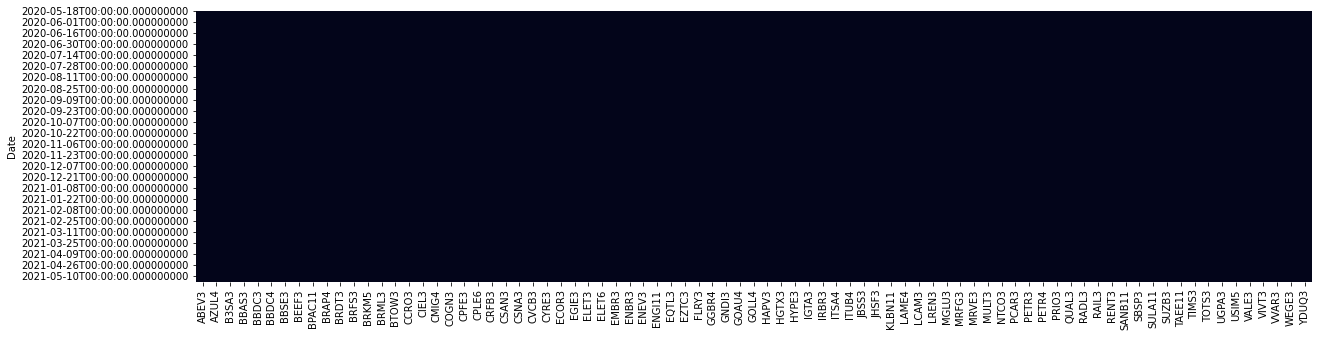

In [21]:
plt.figure(figsize=(20,5))
sns.heatmap(prices.isnull(), cbar=False);

In [20]:
prices.dropna(thresh=200,  axis=1, inplace=True)
prices.dropna(inplace=True)


In [27]:
retorno = prices.pct_change().dropna()

In [28]:
retorno.tail()

,ABEV3,AZUL4,B3SA3,BBAS3,BBDC3,BBDC4,BBSE3,BEEF3,BPAC11,BRAP4,BRDT3,BRFS3,BRKM5,BRML3,BTOW3,CCRO3,CIEL3,CMIG4,COGN3,CPFE3,CPLE6,CRFB3,CSAN3,CSNA3,CVCB3,CYRE3,ECOR3,EGIE3,ELET3,ELET6,EMBR3,ENBR3,ENEV3,ENGI11,EQTL3,EZTC3,FLRY3,GGBR4,GNDI3,GOAU4,...,HAPV3,HGTX3,HYPE3,IGTA3,IRBR3,ITSA4,ITUB4,JBSS3,JHSF3,KLBN11,LAME4,LCAM3,LREN3,MGLU3,MRFG3,MRVE3,MULT3,NTCO3,PCAR3,PETR3,PETR4,PRIO3,QUAL3,RADL3,RAIL3,RENT3,SANB11,SBSP3,SULA11,SUZB3,TAEE11,TIMS3,TOTS3,UGPA3,USIM5,VALE3,VIVT3,VVAR3,WEGE3,YDUQ3
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-05-11,0.022424,0.031662,-0.008443,0.007254,-0.001863,-0.001623,0.026327,-0.003872,-0.018339,0.018462,0.013559,-0.006967,0.014011,-0.001874,-0.010879,0.009804,-0.002865,0.013502,-0.012594,0.020976,0.006723,0.005613,-0.007319,0.020300,0.002783,-0.015209,0.000000,0.006266,0.065428,0.045419,-0.007845,0.003270,0.048544,0.003203,0.009232,-0.012682,0.002694,0.034909,-0.001316,0.026576,...,-0.000669,-0.018467,-0.002355,0.011604,0.021242,0.000000,-0.002140,0.011414,0.004243,0.009993,-0.004571,-0.021317,0.014126,0.006250,0.024728,0.000000,-0.008387,0.003669,-0.012719,0.013207,0.018219,-0.016775,0.021569,-0.020445,-0.010733,-0.001747,-0.006764,-0.002409,0.019758,-0.002191,0.002096,-0.014320,-0.036947,-0.021148,0.008127,0.035138,0.005971,0.007481,-0.000619,0.001052
2021-05-12,0.000000,-0.056960,-0.025544,-0.006547,-0.021465,-0.020325,-0.015819,-0.036929,-0.022218,-0.023644,0.050585,-0.015435,-0.018998,-0.045070,-0.008968,-0.022405,0.002874,-0.039967,-0.035714,-0.036132,-0.036728,-0.052093,-0.015668,-0.045393,-0.039651,-0.024882,-0.025389,-0.020884,-0.051807,-0.034656,-0.052920,-0.007605,-0.027778,-0.030559,-0.035343,-0.044486,-0.025336,-0.026560,-0.050545,-0.030102,...,-0.049531,-0.018459,-0.021245,-0.067447,0.014400,-0.019139,-0.014653,-0.019436,-0.015493,-0.021555,-0.013265,-0.060677,-0.029656,-0.037785,-0.077220,-0.028422,-0.062827,-0.037774,-0.022813,-0.012627,-0.014712,-0.019813,-0.029175,-0.053299,-0.046698,-0.072247,-0.018596,-0.033559,-0.045691,0.001464,-0.022490,-0.032284,-0.043082,0.005144,-0.051336,-0.036978,-0.026256,-0.034653,-0.031589,-0.043433
2021-05-13,0.000593,0.015100,0.004854,0.026689,0.030520,0.023236,0.015204,-0.004036,0.038861,-0.029867,0.000796,-0.028029,0.004499,0.015733,0.024586,0.015279,0.028653,0.021683,0.023810,0.023888,0.005199,0.016683,0.010768,-0.030150,-0.021883,0.025957,0.015966,0.027735,0.069030,0.041363,-0.002569,0.007115,0.015238,0.037168,0.047414,0.013770,0.021662,-0.027831,0.028258,-0.019864,...,0.028169,0.000723,0.018993,0.025338,0.023659,0.017561,0.029017,-0.021419,0.017167,-0.014085,0.004654,0.001656,0.021533,0.029048,-0.037657,0.000597,0.018479,0.039046,0.018676,0.010726,0.008475,-0.026951,-0.007513,0.007874,0.031668,0.008405,0.028022,0.029728,0.002121,-0.023531,0.019262,0.014178,0.009859,0.012282,-0.044723,-0.016094,0.005627,0.044444,0.016949,0.096668
2021-05-14,0.020735,0.017440,0.034783,0.000000,0.006478,0.009327,-0.000856,-0.003039,0.002589,-0.015116,-0.009543,0.021994,0.014995,0.030978,-0.011665,0.006772,0.005571,0.033956,0.028424,0.018306,0.005172,-0.002896,0.034738,-0.019403,0.043478,0.024443,-0.004963,0.010845,-0.006731,-0.004247,0.029620,0.003261,0.034397,0.026310,0.041152,0.046572,0.010794,-0.034521,0.004886,-0.034832,...,0.009589,0.064330,-0.002071,0.000480,-0.050847,0.020134,0.022207,0.003594,0.009845,-0.014652,0.000515,0.009508,-0.008386,0.001046,0.009239,0.036396,0.021519,0.002234,-0.016986,0.046531,0.051621,0.056549,0.072112,0.010937,0.004796,0.000000,0.021288,0.024988,0.005141,-0.024847,0.052756,0.004934,0.009112,0.009100,-0.049626,-0.017157,0.000466,-0.007365,0.009434,0.060434
2021-05-17,0.014510,-0.006554,-0.011765,0.021181,-0.000920,-0.002812,0.008137,0.004065,0.035085,0.026190,-0.001204,0.003348,0.036071,0.029108,-0.018209,0.006726,0.016621,0.019704,0.020100,-0.009870,0.018868,-0.017425,0.017010,0.025319,-0.001618,0.022604,0.007481,0.004740,-0.002761,0.001004,0.005629,0.004334,0.000000,0.009503,-0.002372,0

In [30]:
corr = retorno.corr()
corr

,ABEV3,AZUL4,B3SA3,BBAS3,BBDC3,BBDC4,BBSE3,BEEF3,BPAC11,BRAP4,BRDT3,BRFS3,BRKM5,BRML3,BTOW3,CCRO3,CIEL3,CMIG4,COGN3,CPFE3,CPLE6,CRFB3,CSAN3,CSNA3,CVCB3,CYRE3,ECOR3,EGIE3,ELET3,ELET6,EMBR3,ENBR3,ENEV3,ENGI11,EQTL3,EZTC3,FLRY3,GGBR4,GNDI3,GOAU4,...,HAPV3,HGTX3,HYPE3,IGTA3,IRBR3,ITSA4,ITUB4,JBSS3,JHSF3,KLBN11,LAME4,LCAM3,LREN3,MGLU3,MRFG3,MRVE3,MULT3,NTCO3,PCAR3,PETR3,PETR4,PRIO3,QUAL3,RADL3,RAIL3,RENT3,SANB11,SBSP3,SULA11,SUZB3,TAEE11,TIMS3,TOTS3,UGPA3,USIM5,VALE3,VIVT3,VVAR3,WEGE3,YDUQ3
ABEV3,1.000000,0.397479,0.318069,0.505268,0.576083,0.576544,0.526961,0.174683,0.268984,0.227739,0.426938,0.341944,0.301019,0.401448,0.155277,0.323174,0.306796,0.427831,0.408734,0.429920,0.363339,0.279421,0.322186,0.221411,0.373000,0.437180,0.335222,0.326453,0.375679,0.392963,0.412135,0.378634,0.265587,0.347628,0.356673,0.402559,0.279069,0.314546,0.166294,0.327118,...,0.170226,0.324853,0.397565,0.422705,0.229786,0.562750,0.558800,0.215649,0.355172,0.186688,0.225640,0.293524,0.421739,0.116000,0.073240,0.433864,0.390294,0.325337,0.039788,0.452208,0.462499,0.171705,0.269362,0.296198,0.399713,0.239633,0.514302,0.417084,0.306933,0.112732,0.241013,0.291393,0.155559,0.389507,0.283509,0.211557,0.285839,0.259917,0.282010,0.435885
AZUL4,0.397479,1.000000,0.322369,0.505598,0.523838,0.514488,0.381585,0.055919,0.412883,0.084700,0.418687,0.292923,0.220999,0.573807,0.132377,0.413006,0.347477,0.404180,0.448942,0.359368,0.369318,0.282044,0.256468,0.258473,0.637619,0.493339,0.440444,0.334893,0.308578,0.299772,0.663291,0.329298,0.197492,0.397062,0.341945,0.475679,0.356746,0.244113,0.140428,0.244375,...,0.222000,0.420154,0.244759,0.508259,0.235287,0.490498,0.481041,0.126139,0.441808,-0.005569,0.160078,0.387848,0.467992,0.128420,-0.076355,0.451130,0.494310,0.278773,0.050025,0.436057,0.441178,0.179269,0.313811,0.233438,0.454522,0.413207,0.463092,0.266690,0.281827,-0.081777,0.192061,0.323578,0.162348,0.391452,0.287397,0.114672,0.303915,0.328433,0.178163,0.464676
B3SA3,0.318069,0.322369,1.000000,0.467950,0.462589,0.402151,0.511205,0.178128,0.559433,0.214983,0.495089,0.179291,0.184498,0.427673,0.274398,0.558268,0.336879,0.495298,0.431866,0.501221,0.353332,0.380278,0.361724,0.236032,0.281774,0.617937,0.571715,0.464624,0.367606,0.385893,0.267202,0.451598,0.426409,0.492190,0.576013,0.532218,0.423452,0.283148,0.327977,0.298733,...,0.414187,0.282258,0.449668,0.355154,0.235976,0.489791,0.427578,0.195983,0.471499,0.052539,0.226443,0.407755,0.353443,0.446497,0.084158,0.478106,0.344957,0.451349,0.124348,0.364586,0.354526,0.213779,0.442374,0.399820,0.435802,0.437279,0.398731,0.454372,0.455067,-0.003314,0.231785,0.356941,0.388502,0.432689,0.248334,0.199075,0.227835,0.491624,0.443778,0.429650
BBAS3,0.505268,0.505598,0.467950,1.000000,0.854310,0.829537,0.613130,0.111773,0.450688,0.238390,0.583549,0.363438,0.257323,0.541683,0.058571,0.533914,0.364282,0.555981,0.489842,0.469336,0.508411,0.309810,0.440671,0.284385,0.432455,0.599369,0.522778,0.462341,0.465458,0.476792,0.443947,0.494717,0.207210,0.425349,0.418747,0.533874,0.369937,0.329764,0.151464,0.336348,...,0.253277,0.392799,0.337062,0.519277,0.329165,0.813129,0.825008,0.128578,0.412559,-0.041342,0.088335,0.353983,0.522207,0.157151,-0.004112,0.473801,0.512946,0.281856,0.086586,0.696331,0.684991,0.206727,0.408734,0.300198,0.433195,0.340889,0.746013,0.450235,0.400902,-0.053684,0.272999,0.415076,0.167232,0.523371,0.297009,0.262231,0.303518,0.413491,0.213465,0.437167
BBDC3,0.576083,0.523838,0.462589,0.854310,1.000000,0.946683,0.601608,0.100616,0.453813,0.274929,0.539754,0.320695,0.279439,0.554629,0.002988,0.512313,0.318554,0.565385,0.493318,0.467593,0.486327,0.319300,0.406664,0.318145,0.470718,0.557752,0.512301,0.430948,0.430290,0.450865,0.502776,0.444958,0.233951,0.410937,0.394606,0.508905,0.337156,0.360570,0.134515,0.370299,...,0.215998,0.401237,0.332444,0.541260,0.322065,0.881115,0.895959,0.083093,0.357094,-0.030510,0.129494,0.345501,0.525185,0.069454,-0.034892,0.466734,0.553171,0.300319,0.037373,0.644678,0.618857,0.240409,0.373647,0.3

In [31]:
plt.figure(figsize=(50,50))
plt.title('Mapa de Correlação IBOV - 12  meses', fontsize=16, pad=20, fontweight=600)
ax = sns.heatmap(corr, annot=True, cbar=False, cmap='coolwarm', fmt='.2f')
ax.tick_params(axis = "y", labelright =True, labelrotation=0, labelsize='large')
ax.tick_params(axis = "x", labeltop =True, labelrotation=90, labelsize='large' )

Output hidden; open in https://colab.research.google.com to view.

In [32]:
empresas = corr.median().sort_values(ascending=False)

fig  = px.bar(x=empresas, y=empresas.index, orientation='h', text=round(empresas, 2))

fig.layout.title = "Correlação Mediana da Empresa com as Demais"
fig.layout.xaxis.title = ""
fig.layout.yaxis.title = ""
fig.layout.xaxis.side = 'top'

fig.layout.height = 1400

fig.show()